## IMPORTING LIBRARIES

In [120]:
import numpy as np
import pandas as pd
import nltk
# from nltk.tag import pos_tag
# from nltk.tokenize import word_tokenize

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import warnings

import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [104]:
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
cf.go_offline();

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)

## READ IN DATA (TRAINING DATA)

In [105]:
df = pd.read_csv('Luxury_Beauty.csv')

## GRAPH PLOTTING FOR RATINGS VS NUMBER OF ITEMS

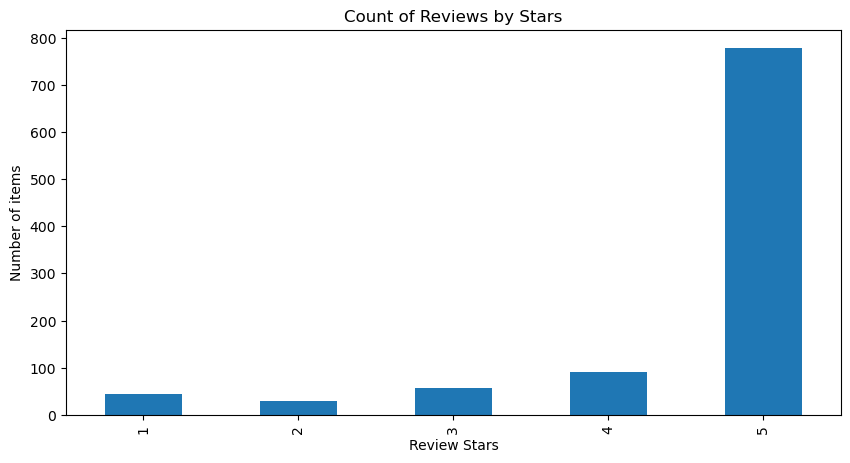

In [106]:
df.head(1000)['overall'].value_counts()
ax = df.head(1000)['overall'].value_counts().sort_index().plot(kind = 'bar', title = 'Count of Reviews by Stars', figsize = (10, 5))

ax.set_xlabel('Review Stars')
ax.set_ylabel('Number of items')
plt.show()

## BASIC NLTK

In [107]:
# example = df['summary'][5]
# print(example)

#### REQUIRED FOR TOKENIZATION (ONE TIME USE)

In [108]:
# nltk.download('punkt')

#### REQUIRED FOR PARTS OF SPEECH TAGGING (ONE TIME USE)

In [109]:
# nltk.download('averaged_perceptron_tagger')

In [110]:
# hello = nltk.word_tokenize(example, "english", 50)
# hello[:10]

In [111]:
# tagged = nltk.tag.pos_tag(hello, None, "eng")
# print(tagged,"\n")
# tagged[:10]

## VADER (Valence Aware Dictionary for Sentiment Reasoning)

#### We will use nltk's SentimentIntensityAnalyzer to get the neg/neu/pos (NEGATIVE/NEUTRAL/POSITIVE) scores of the sentence.

#### This uses a 'Bag Of words (BOW)' approach:
####   1. Stop words are removed (the, a, ummm, hmmm, etc..)
####   2. Each word is scored and combined to a total score

In [112]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
from pandas.core.reshape.merge import merge

# nltk.download('vader_lexicon')

## STARTING OF SENTIMENT ANALYSIS

### ANALYSIS OF USER DEFINED SENTENCE

In [ ]:
sia = SentimentIntensityAnalyzer()

# You need to first initialize an object of SentimentIntensityAnalyzer then call the method polarity_scores on that
check = input("Enter a sentence: ")

# print(sia.polarity_scores(check))
result = sia.polarity_scores(check)

Enter a sentence:  good


In [97]:
# Find the key with the maximum numeric value in the result dictionary
max_key = max(result, key=result.get)

print("Sentiment Scores:", result)
print("Max Sentiment is", max_key, "with score of", result[max_key])

Sentiment Scores: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
Max Sentiment is pos with score of 1.0


### ANALYSIS OF THE PROVIDED SENTENCE WITHIN THE CODE

In [98]:
sia = SentimentIntensityAnalyzer()

# You need to first initialize an object of SentimentIntensityAnalyzer then call the method polarity_scores on that
sentences = ["I am very sad!"]

for sentence in sentences:
    print(sia.polarity_scores(sentence))

{'neg': 0.648, 'neu': 0.352, 'pos': 0.0, 'compound': -0.5697}


### Run the polarity score on the entire dataset

In [99]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['reviewText'])
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 1009/1009 [00:00<00:00, 2863.09it/s]


### GETTING POSTIVE, NEUTRAL AND NEGATIVE RATINGS

In [100]:
barplotting = pd.DataFrame(res).T
finalResult = pd.concat([barplotting, df], axis = 1)

## BAR PLOT FOR COMPOUND REVIEWS

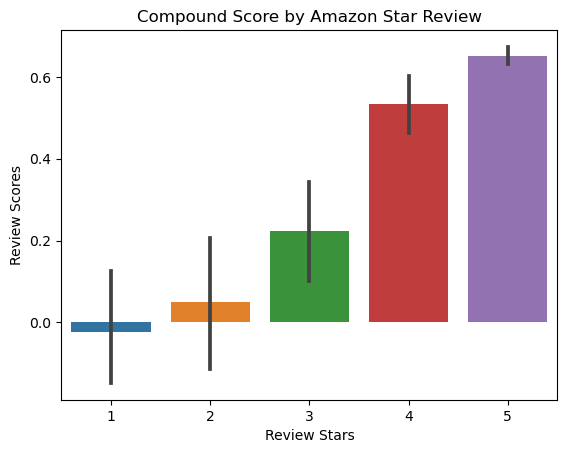

In [101]:
ax = sns.barplot(data = finalResult, x = 'overall', y = 'compound')
ax.set_xlabel('Review Stars')
ax.set_ylabel('Review Scores')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

## POSITIVE VS NEUTRAL VS NEGATIVE

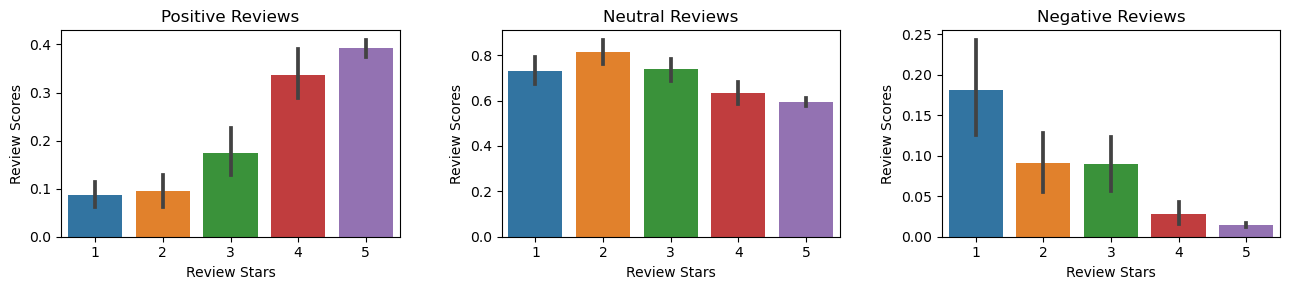

In [102]:
fig, axs = plt.subplots(1, 3, figsize = (13, 3))
sns.barplot(data = finalResult, x = 'overall', y='pos', ax=axs[0])
sns.barplot(data = finalResult, x = 'overall', y='neu', ax=axs[1])
sns.barplot(data = finalResult, x = 'overall', y='neg', ax=axs[2])

axs[0].set_xlabel('Review Stars')
axs[0].set_ylabel('Review Scores')

axs[1].set_xlabel('Review Stars')
axs[1].set_ylabel('Review Scores')

axs[2].set_xlabel('Review Stars')
axs[2].set_ylabel('Review Scores')

axs[0].set_title('Positive Reviews')
axs[1].set_title('Neutral Reviews')
axs[2].set_title('Negative Reviews')

plt.tight_layout(w_pad = 3, h_pad = 1.2)
plt.show()